# Output of solar energy

1. Source of data
  - https://www.kaggle.com/datasets/anikannal/solar-power-generation-data
2. Brief description of data
  - This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [2]:
pd.set_option('display.max_columns',100)
P1gen= 'Data/Plant_1_Generation_Data.csv'
P2gen='Data/Plant_2_Generation_Data.csv'

df1=pd.read_csv(P1gen)
df2=pd.read_csv(P2gen)
df=pd.concat([df1,df2])
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [3]:
df['DATE_TIME']=pd.to_datetime(df['DATE_TIME'])
df['dayofweek']=df['DATE_TIME'].dt.day_of_week
df['time']=df['DATE_TIME'].dt.time

In [4]:
df=df.drop(columns='PLANT_ID')

In [5]:
label_encoder = LabelEncoder()
df['SOURCE_KEY'] = label_encoder.fit_transform(df['SOURCE_KEY'])

In [6]:
df.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,dayofweek,time
0,2020-05-15,0,0.0,0.0,0.0,6259559.0,4,00:00:00
1,2020-05-15,1,0.0,0.0,0.0,6183645.0,4,00:00:00
2,2020-05-15,2,0.0,0.0,0.0,6987759.0,4,00:00:00
3,2020-05-15,4,0.0,0.0,0.0,7602960.0,4,00:00:00
4,2020-05-15,11,0.0,0.0,0.0,7158964.0,4,00:00:00


In [7]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
Hour           0
dayofweek      0
dtype: int64

Series([], dtype: float64)

In [10]:
df.select_dtypes('float').nunique()

DC_POWER       63607
AC_POWER       62915
DAILY_YIELD    59307
TOTAL_YIELD    70382
dtype: int64

In [52]:
y = df['TOTAL_YIELD']
X = df.drop(columns = 'TOTAL_YIELD')

In [53]:
df

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Hour,dayofweek
0,2020-05-15 00:00:00,0,0.0,0.0,0.0,6259559.0,0,4
1,2020-05-15 00:00:00,1,0.0,0.0,0.0,6183645.0,0,4
2,2020-05-15 00:00:00,2,0.0,0.0,0.0,6987759.0,0,4
3,2020-05-15 00:00:00,4,0.0,0.0,0.0,7602960.0,0,4
4,2020-05-15 00:00:00,11,0.0,0.0,0.0,7158964.0,0,4
...,...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,32,0.0,0.0,4157.0,520758.0,23,2
67694,2020-06-17 23:45:00,34,0.0,0.0,3931.0,121131356.0,23,2
67695,2020-06-17 23:45:00,37,0.0,0.0,4322.0,2427691.0,23,2
67696,2020-06-17 23:45:00,39,0.0,0.0,4218.0,106896394.0,23,2


experimental
/

In [54]:
#encoder = OneHotEncoder(sparse=False)
#X_encoded = encoder.fit_transform(X[['SOURCE_KEY']])

In [8]:
corr = df.corr()
corr.round(2)

C:\Users\clove\AppData\Local\Temp\ipykernel_24872\4095032161.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,dayofweek
SOURCE_KEY,1.00,0.08,0.02,0.02,-0.20,0.00
DC_POWER,0.08,1.00,0.75,0.05,-0.24,0.02
AC_POWER,0.02,0.75,1.00,0.05,-0.04,0.02
DAILY_YIELD,0.02,0.05,0.05,1.00,-0.04,0.03
TOTAL_YIELD,-0.20,-0.24,-0.04,-0.04,1.00,-0.01
dayofweek,0.00,0.02,0.02,0.03,-0.01,1.00


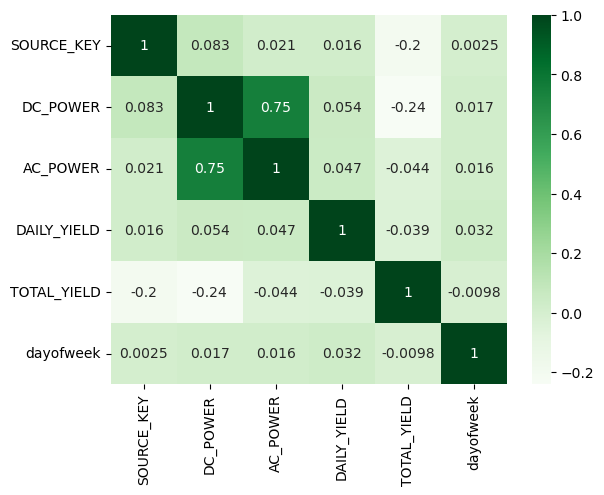

In [9]:
sns.heatmap(corr, cmap = 'Greens', annot = True);

Text(0.5, 0, 'Inverter Number')

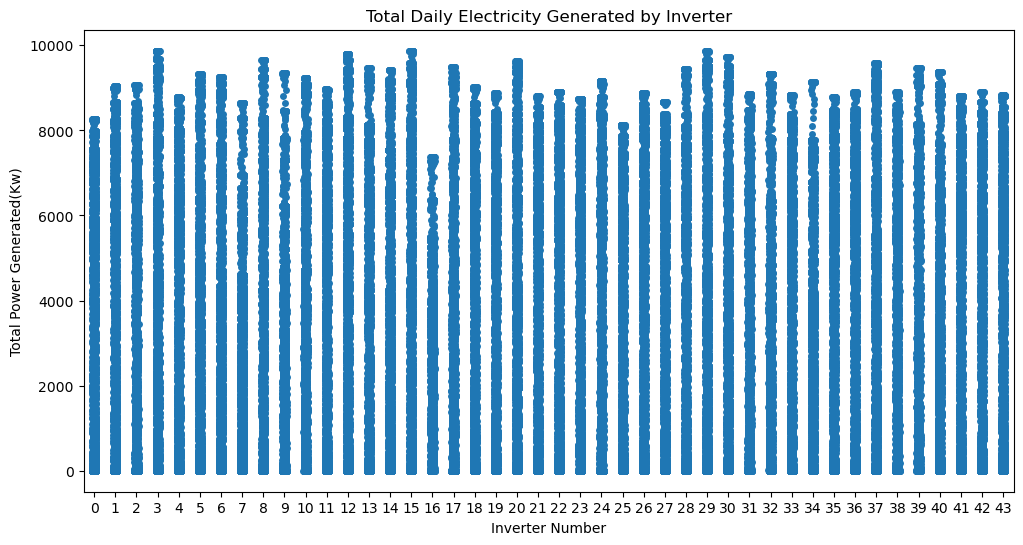

In [13]:
plt.figure(figsize=(12, 6))
ax = sns.stripplot(data=df, x='SOURCE_KEY', y='DAILY_YIELD',  )
ax.set_title('Total Daily Electricity Generated by Inverter')
ax.set_ylabel('Total Power Generated(Kw)')
ax.set_xlabel('Inverter Number')

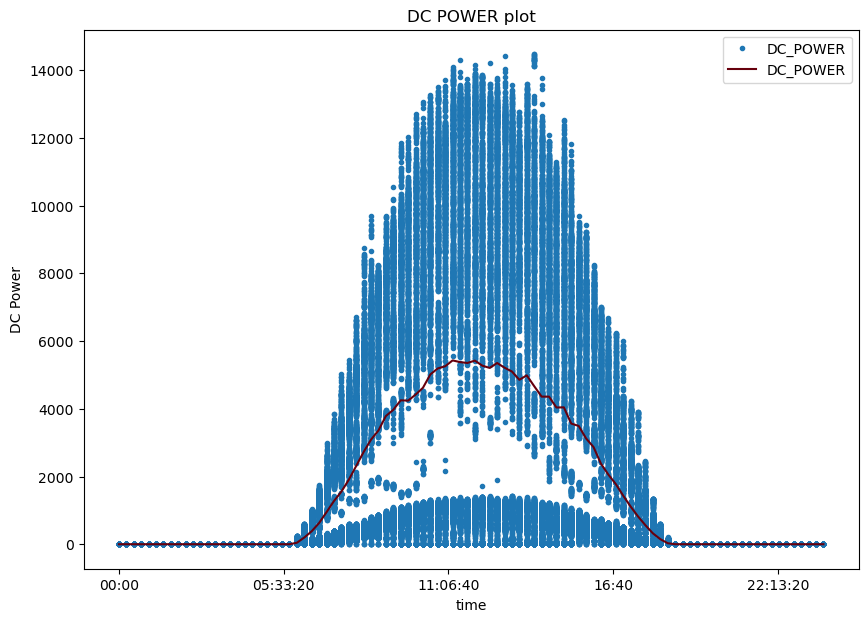

In [14]:
df.plot(x= 'time', y='DC_POWER', style='.', figsize = (10, 7))
df.groupby('time')['DC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('DC Power')
plt.title('DC POWER plot')
plt.show()

In [18]:
X = df.drop(columns = ['DAILY_YIELD'])
y=df['DAILY_YIELD']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)

Numeric Columns: Index(['SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'TOTAL_YIELD', 'dayofweek'], dtype='object')


In [30]:
col_transformer = ColumnTransformer([num_tuple],
                                    verbose_feature_names_out=False)
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'TOTAL_YIELD', 'dayofweek'], dtype='object'))],
                  verbose_feature_names_out=False)

_cHECKPOINT

- FUNCTIONJUNCTION

In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
# Get metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r_squared = r2_score(y_true, y_pred)
if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                    output_dict=output_frame,
                                    label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 26)

RF regessor playground

In [56]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)


TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

In [ ]:

print(f"- MAE = {mae:,.3f}")
print(f"- MSE = {mse:,.3f}")
print(f"- RMSE = {rmse:,.3f}")
print(f"- R^2 = {r2:,.3f}")

- MAE = 3,735,764.711
- MSE = 1,772,320,211,828,833.000
- RMSE = 42,098,933.619
- R^2 = 0.995


In [ ]:
r2

0.9951624101147217

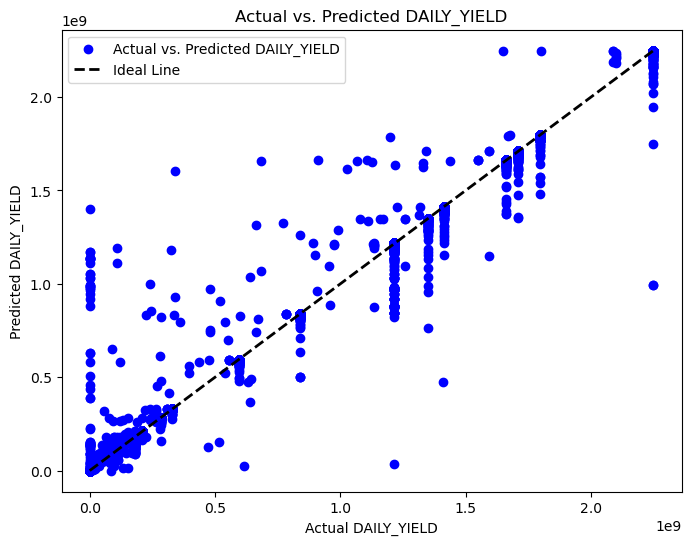

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', label='Actual vs. Predicted DAILY_YIELD')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Line')
plt.xlabel("Actual DAILY_YIELD")
plt.ylabel("Predicted DAILY_YIELD")
plt.title("Actual vs. Predicted DAILY_YIELD")
plt.legend()
plt.show()